# Random Search vs Linear Search vs Binary Search 

I recently read through this wonderful tutorial from Real Python: [tutorial](https://realpython.com/binary-search-python/) and was inspired to write a bit about it.  I feel that for me going through a tutorial and then writing a blog post really makes me learn a topic a little more. 

Start with loading in a dataset. 

In [207]:
def load_names(path):
    with open(path) as text_file:
        return text_file.read().splitlines()

sorted_names = load_names('sorted_names.txt')

In [208]:
sorted_names[:10]

["!'aru Ikhuisi Piet Berendse",
 '!Gubi Tietie',
 '!Mystery Girl!',
 '!Nqate Xqamxebe',
 '#1 FanGirl',
 '$2 Tony',
 '$HollyHood$',
 '$crim',
 '$haniqua',
 '$hutter']

Since I will be using a binary search I will be using a dataset that is already sorted.  I am going to be calculating how long it takes to find an element in a list, but will not be taking into consideration the time it takes to sort the list.  We will see later on (Spoiler Alert) that binary search is much faster than linear and random search, but requires the data to be sorted.  

I am first going to try out random search.

In [217]:
from typing import Set
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import bisect

## Random Search 

Random search is picking an element out of the list randomly and if it matches what you are looking for, you are done otherwise you put the element back in the list and grab another random element.  There is a small chance that you will get lucky, however that is usually not the case and this is not very efficient.  

In [150]:
def find_index(elements, value):
    """Return the index of value in elements or None."""
    # make set so that I do not have duplicate numbers
    visited: Set[int] = set()
    # check if I have tried every element 
    while len(visited) < len(elements):
        # grab random number
        random_index = random.randint(0, len(elements) - 1)
        # add to visisted set
        visited.add(random_index)
        if elements[random_index] == value:
            return random_index
    return None

Now I am going to build a big for loop that will test out the random set on lists of size 10, 100, 1000, 10000, 1000000, 5000000, and 9962851.  I am going to be timing how long it takes to find the first element, the middle element, the last element, and an element that does not exist.  I am going to run this 3 times and take the average. 

In [151]:
times = []
for x in [10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)]:
    # length of list
    len_list = sorted_names[:x]
    middle = (0 + x) // 2
    times_for_each_run = []
    for name in [len_list[0], len_list[middle], len_list[x-1], None]:
        avg_time = 0
        for i in range(3):
            t0 = time.time()
            find_index(len_list, name)
            avg_time += time.time() - t0
        times_for_each_run.append(avg_time / 3)
    times.append(times_for_each_run)

Save my times to a list, so I can plot. 

In [152]:
first_element_random = [x[0] for x in times]
middle_element_random = [x[1] for x in times]
last_element_random = [x[2] for x in times]
no_element_random = [x[3] for x in times]

Now I am going to plot out my results

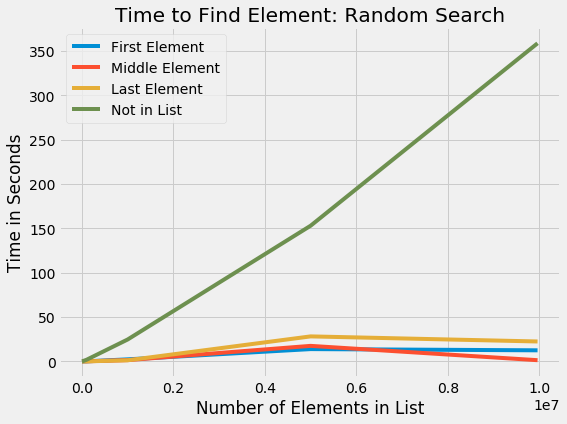

In [154]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_random, label = 'First Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            middle_element_random, label = 'Middle Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            last_element_random, label = 'Last Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            no_element_random, label = 'Not in List')
    plt.legend()
    plt.title('Time to Find Element: Random Search')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')

I see that finding the missing element takes a huge amount of time, this is because it has to try every element in the list and because it is grabbing elements at random, it could have to try more than the length of my list.  

Lets take a look at the times for everything besides when the missing element.  

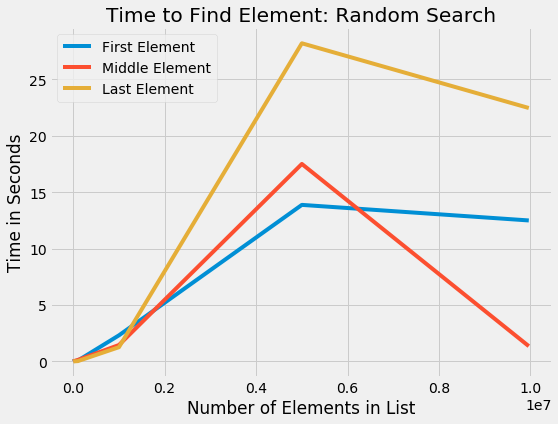

In [210]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_random, label = 'First Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            middle_element_random, label = 'Middle Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            last_element_random, label = 'Last Element')
    plt.legend()
    plt.title('Time to Find Element: Random Search')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')

We see that finding the last element and finding the middle element takes about the same amount of time, this is due to the random checking so the order of the elements do not matter on a random search. 

Now I will take a look at a linear search. 

## Linear Search 

Linear search involves checking in order.  If I am going to look for a particular element in a list - I will check the first element, then the second element, then the third element, etc. 

In [211]:
def find_index_ls(elements, value):
    for index, element in enumerate(elements):
        if element == value:
            return index
    return None

In [212]:
times_ls = []
for x in [10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)]:
    # length of list
    len_list = sorted_names[:x]
    middle = (0 + x) // 2
    times_for_each_run = []
    for name in [len_list[0], len_list[middle], len_list[x-1], None]:
        avg_time = 0
        for i in range(3):
            t0 = time.time()
            find_index_ls(len_list, name)
            avg_time += time.time() - t0
        times_for_each_run.append(avg_time / 3)
    times_ls.append(times_for_each_run)

In [213]:
first_element_ls = [x[0] for x in times_ls]
middle_element_ls = [x[1] for x in times_ls]
last_element_ls = [x[2] for x in times_ls]
no_element_ls = [x[3] for x in times_ls]

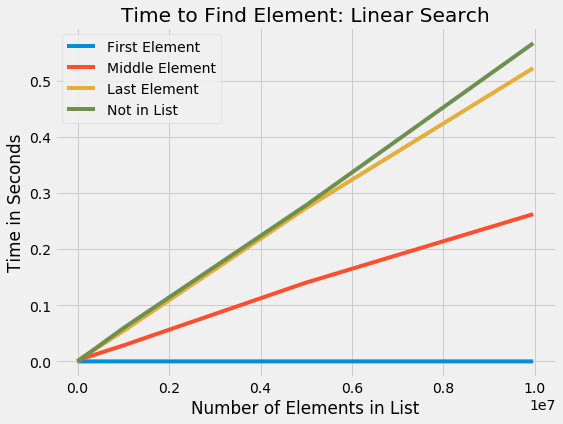

In [214]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_ls, label = 'First Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            middle_element_ls, label = 'Middle Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            last_element_ls, label = 'Last Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            no_element_ls, label = 'Not in List')
    plt.legend()
    plt.title('Time to Find Element: Linear Search')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')

We see that finding the first element does not change regardless of the number of elements in the list.  Also we see that the other elements increase in a linear fashion.  Now lets see how it compares to random search. 

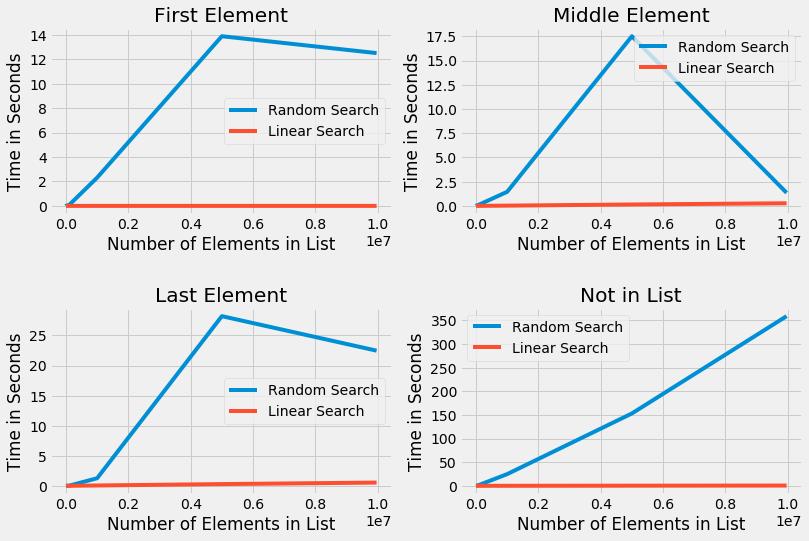

In [176]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))

    ax1 = plt.subplot(221)
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_random, label = 'Random Search')
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_ls, label = 'Linear Search')
    plt.legend()
    plt.title('First Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax2 = plt.subplot(222)
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_random, label = 'Random Search')
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_ls, label = 'Linear Search')
    plt.legend()
    plt.title('Middle Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax3 = plt.subplot(223)
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_random, label = 'Random Search')
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_ls, label = 'Linear Search')
    plt.legend()
    plt.title('Last Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax4 = plt.subplot(224)
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_random, label = 'Random Search')
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_ls, label = 'Linear Search')
    plt.legend()
    plt.title('Not in List')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    plt.subplots_adjust(hspace=0.5)

We see that random search and linear search are equal at the smallest list sizes, but as the lists increase in size the random search starts taking longer.  This makes sense because with random search we could potentially be checking the same element multiple times. 

## Binary Search

Binary search is the final approach that I am going to be taking.  It requires the list that we are performing the search to be sorted.  Lets say we have the list `[1, 2, 3, 4, 5]` and we are looking for the number `2`.  First we would find what the middle number is and check to see if our number that we are looking for `2` is smaller or larger than that number.  In this case the middle number is `3` and the number we are looking for is smaller than that.  This means that we do not have to look at any numbers greater than `3`.  So we now have a list of `[1, 2]`.  Which we can repeat the process. When doing this the maximum number of checks we have to do is log base 2 of the number of elments in our list.

In [15]:
math.log(len(sorted_names), 2)

23.248127216737352

In [16]:
len(sorted_names)

9962851

This tells us that of our original list of 9,962,851 elements it would require a maximum of 23 checks - much smaller than the linear search which has a maximum check of 9,962,851.  

There is a python package `bisect` that can perform this for us.  

In [218]:
import bisect
sorted_numbs = [1, 2, 3, 4, 5]
bisect.bisect_left(sorted_numbs, 2)

1

This lets us know that the 2 is element number `1` in `sorted_numbs`. 

In [223]:
def find_index_bs(elements, value):
    left, right = 0, len(elements) - 1

    while left <= right:
        middle = (left + right) // 2

        if elements[middle] == value:
            return middle

        if elements[middle] < value:
            left = middle + 1
        elif elements[middle] > value:
            right = middle - 1
    return None

In [224]:
times_bs = []
for x in [10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)]:
    # length of list
    len_list = sorted_names[:x]
    middle = (0 + x) // 2
    times_for_each_run = []
    for name in [len_list[0], len_list[middle], len_list[x-1], 'a']:
        avg_time = 0
        for i in range(3):
            t0 = time.time()
            find_index_bs(len_list, name)
            avg_time += time.time() - t0
        times_for_each_run.append(avg_time / 3)
    times_bs.append(times_for_each_run)

In [225]:
first_element_bs = [x[0] for x in times_bs]
middle_element_bs = [x[1] for x in times_bs]
last_element_bs = [x[2] for x in times_bs]
no_element_bs = [x[3] for x in times_bs]

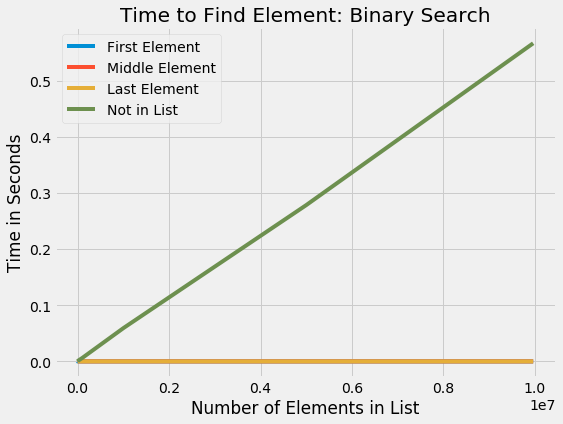

In [226]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_bs, label = 'First Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            middle_element_bs, label = 'Middle Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            last_element_bs, label = 'Last Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            no_element_ls, label = 'Not in List')
    plt.legend()
    plt.title('Time to Find Element: Binary Search')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')

We see that when the element is not in the list, it takes significantly longer to find.  This is because the binary search is having to perform the maximum number of checks on the list.  

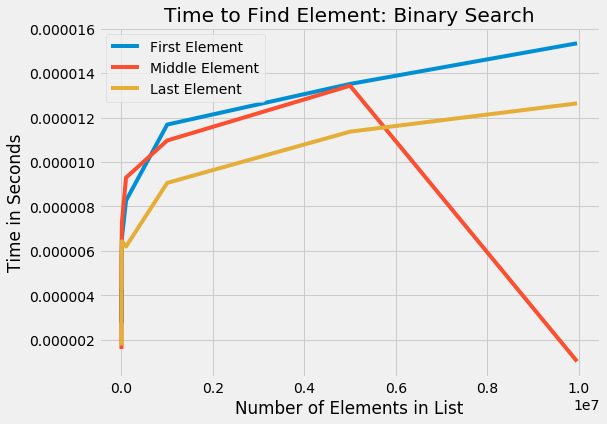

In [201]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_bs, label = 'First Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            middle_element_bs, label = 'Middle Element')
    plt.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)],
            last_element_bs, label = 'Last Element')
    plt.legend()
    plt.title('Time to Find Element: Binary Search')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')

We see that finding the first, middle, and last element take about the same amount of time.  As the list gets larger the time to find the middle element decreases.  Since binary search is constantly splitting the dataset and looking for the middle number, this makes sense.

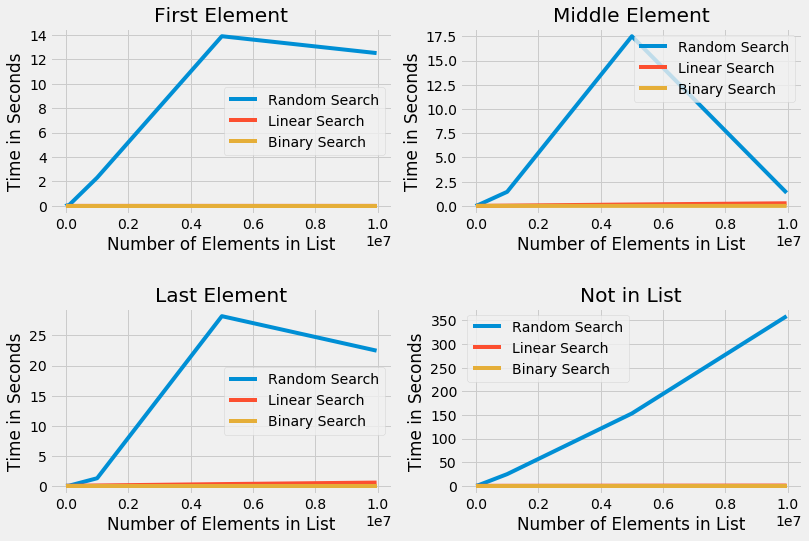

In [202]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))

    ax1 = plt.subplot(221)
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_random, label = 'Random Search')
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_ls, label = 'Linear Search')
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('First Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax2 = plt.subplot(222)
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_random, label = 'Random Search')
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_ls, label = 'Linear Search')
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Middle Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax3 = plt.subplot(223)
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_random, label = 'Random Search')
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_ls, label = 'Linear Search')
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Last Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax4 = plt.subplot(224)
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_random, label = 'Random Search')
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_ls, label = 'Linear Search')
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Not in List')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    plt.subplots_adjust(hspace=0.5)

We see that random search takes much longer than linear search and binary search.  

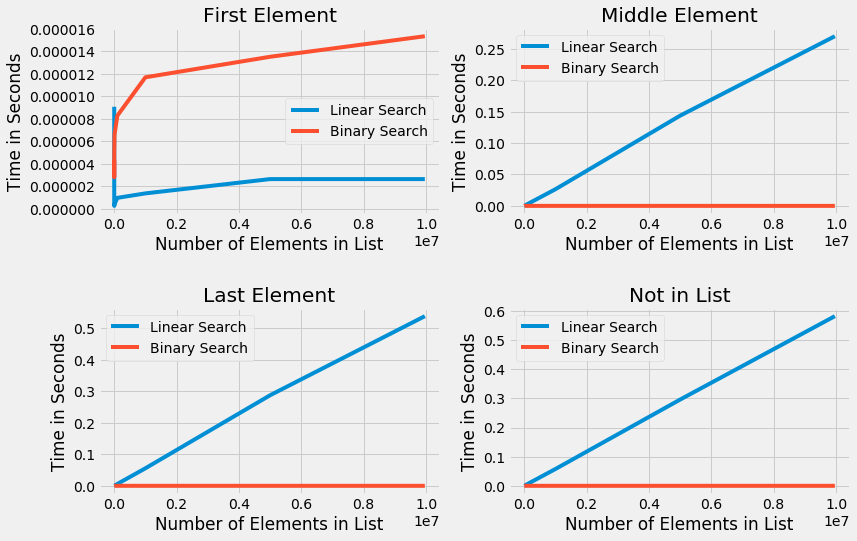

In [203]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))

    ax1 = plt.subplot(221)
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_ls, label = 'Linear Search')
    ax1.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            first_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('First Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax2 = plt.subplot(222)
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_ls, label = 'Linear Search')
    ax2.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            middle_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Middle Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax3 = plt.subplot(223)
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_ls, label = 'Linear Search')
    ax3.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            last_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Last Element')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    ax4 = plt.subplot(224)
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_ls, label = 'Linear Search')
    ax4.plot([10, 100, 1000, 10000, 100000, 1000000, 5000000, len(sorted_names)], 
            no_element_bs, label = 'Binary Search')
    plt.legend()
    plt.title('Not in List')
    plt.xlabel('Number of Elements in List')
    plt.ylabel('Time in Seconds')
    
    plt.subplots_adjust(hspace=0.5)

Comparing just linear search and random search - we see that when checking for the first element linear search is faster than binary search (however the chances of always looking for the first element is small).  We also see that binary search and linear search are about the same when the dataset is small, as the dataset increases is when we the the advanatage of binary search.  

Link to [tutorial](https://realpython.com/binary-search-python/#random-search)